In [0]:
%python

df = spark.table("travel_bookings")  # e.g., spark.table("default.matches")
df.printSchema()
df.display()

root
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- hotel_id: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- hotel_location: string (nullable = true)
 |-- booking_id: string (nullable = true)
 |-- stay_duration: long (nullable = true)
 |-- amount_spent: long (nullable = true)
 |-- status: string (nullable = true)
 |-- rating: long (nullable = true)



customer_id,customer_name,city,hotel_id,hotel_name,hotel_location,booking_id,stay_duration,amount_spent,status,rating
C001,Neha,Pune,H106,Conrad,Pune,B001,5,35140,cancelled,94
C002,John,Hyderabad,H101,Taj Krishna,Hyderabad,B002,7,42158,cancelled,91
C003,Vikas,Pune,H106,Conrad,Pune,B003,1,36451,booked,60
C004,Sneha,Pune,H106,Hyatt,Pune,B004,8,18071,booked,70
C005,Sneha,Pune,H106,Marriott,Pune,B005,10,44743,booked,96
C006,Sara,Chennai,H104,ITC Grand Chola,Chennai,B006,10,43222,cancelled,79
C007,Ramesh,Delhi,H103,Leela Palace,Delhi,B007,7,44116,booked,51
C008,Aditi,Hyderabad,H101,Novotel,Hyderabad,B008,6,26642,booked,94
C009,Rahul,Chennai,H104,Taj Coromandel,Chennai,B009,6,45354,booked,64
C010,John,Hyderabad,H101,Novotel,Hyderabad,B010,8,14850,cancelled,59


In [0]:
%python
from pyspark.sql import functions as F


df = spark.table("travel_bookings")


df.printSchema()


display(df)


# 1. Total Revenue

total_revenue = df.agg(F.sum("amount_spent").alias("total_revenue"))
display(total_revenue)

# -------------------------
# 2. Average Stay Duration by City
# -------------------------
avg_stay = df.groupBy("city").agg(F.avg("stay_duration").alias("avg_stay_duration"))
display(avg_stay)

# -------------------------
# 3. Count of Bookings by Status
# -------------------------
status_count = df.groupBy("status").agg(F.count("*").alias("total_bookings"))
display(status_count)

# -------------------------
# 4. Average Rating by Hotel
# -------------------------
hotel_rating = df.groupBy("hotel_name").agg(F.avg("rating").alias("avg_rating"))
display(hotel_rating)

# -------------------------
# 5. Top 5 Customers by Spending
# -------------------------
top_customers = df.groupBy("customer_name") \
                 .agg(F.sum("amount_spent").alias("total_spent")) \
                 .orderBy(F.col("total_spent").desc()) \
                 .limit(5)
display(top_customers)

# -------------------------
# 6. Revenue by City
# -------------------------
revenue_city = df.groupBy("city").agg(F.sum("amount_spent").alias("city_revenue"))
display(revenue_city)


root
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- hotel_id: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- hotel_location: string (nullable = true)
 |-- booking_id: string (nullable = true)
 |-- stay_duration: long (nullable = true)
 |-- amount_spent: long (nullable = true)
 |-- status: string (nullable = true)
 |-- rating: long (nullable = true)



customer_id,customer_name,city,hotel_id,hotel_name,hotel_location,booking_id,stay_duration,amount_spent,status,rating
C001,Neha,Pune,H106,Conrad,Pune,B001,5,35140,cancelled,94
C002,John,Hyderabad,H101,Taj Krishna,Hyderabad,B002,7,42158,cancelled,91
C003,Vikas,Pune,H106,Conrad,Pune,B003,1,36451,booked,60
C004,Sneha,Pune,H106,Hyatt,Pune,B004,8,18071,booked,70
C005,Sneha,Pune,H106,Marriott,Pune,B005,10,44743,booked,96
C006,Sara,Chennai,H104,ITC Grand Chola,Chennai,B006,10,43222,cancelled,79
C007,Ramesh,Delhi,H103,Leela Palace,Delhi,B007,7,44116,booked,51
C008,Aditi,Hyderabad,H101,Novotel,Hyderabad,B008,6,26642,booked,94
C009,Rahul,Chennai,H104,Taj Coromandel,Chennai,B009,6,45354,booked,64
C010,John,Hyderabad,H101,Novotel,Hyderabad,B010,8,14850,cancelled,59


total_revenue
2150186


city,avg_stay_duration
Bangalore,5.636363636363637
Chennai,6.090909090909091
Delhi,5.909090909090909
Mumbai,7.0
Pune,7.166666666666667
Hyderabad,6.1


status,total_bookings
booked,37
cancelled,38


hotel_name,avg_rating
ITC Gardenia,72.6
The Leela Palace,100.0
Marriott,63.75
The Oberoi,65.25
Taj Krishna,86.0
Novotel,79.125
ITC Grand Chola,76.5
ITC Kakatiya,67.83333333333333
Taj West End,75.4
Conrad,76.6


customer_name,total_spent
Divya,216419
Rahul,204143
John,189195
Sneha,183620
Anjali,179168


city,city_revenue
Bangalore,281435
Chennai,371254
Delhi,293873
Mumbai,317153
Pune,329535
Hyderabad,556936


In [0]:
# Register the table as a SQL view
df = spark.table("travel_bookings")
df.createOrReplaceTempView("travel_bookings")

# -------------------------
# 1. Total Revenue
# -------------------------
total_revenue = spark.sql("""
    SELECT SUM(amount_spent) AS total_revenue
    FROM travel_bookings
""")
display(total_revenue)

# -------------------------
# 2. Average Stay Duration by City
# -------------------------
avg_stay = spark.sql("""
    SELECT city, AVG(stay_duration) AS avg_stay_duration
    FROM travel_bookings
    GROUP BY city
""")
display(avg_stay)

# -------------------------
# 3. Booking Status Count
# -------------------------
status_count = spark.sql("""
    SELECT status, COUNT(*) AS total_bookings
    FROM travel_bookings
    GROUP BY status
""")
display(status_count)

# -------------------------
# 4. Average Rating by Hotel
# -------------------------
hotel_rating = spark.sql("""
    SELECT hotel_name, AVG(rating) AS avg_rating
    FROM travel_bookings
    GROUP BY hotel_name
""")
display(hotel_rating)

# -------------------------
# 5. Top 5 Customers by Spending
# -------------------------
top_customers = spark.sql("""
    SELECT customer_name, SUM(amount_spent) AS total_spent
    FROM travel_bookings
    GROUP BY customer_name
    ORDER BY total_spent DESC
    LIMIT 5
""")
display(top_customers)

# -------------------------
# 6. Revenue by City
# -------------------------
revenue_city = spark.sql("""
    SELECT city, SUM(amount_spent) AS city_revenue
    FROM travel_bookings
    GROUP BY city
    ORDER BY city_revenue DESC
""")
display(revenue_city)


total_revenue
2150186


city,avg_stay_duration
Bangalore,5.636363636363637
Chennai,6.090909090909091
Delhi,5.909090909090909
Mumbai,7.0
Pune,7.166666666666667
Hyderabad,6.1


status,total_bookings
booked,37
cancelled,38


hotel_name,avg_rating
ITC Gardenia,72.6
The Leela Palace,100.0
Marriott,63.75
The Oberoi,65.25
Taj Krishna,86.0
Novotel,79.125
ITC Grand Chola,76.5
ITC Kakatiya,67.83333333333333
Taj West End,75.4
Conrad,76.6


customer_name,total_spent
Divya,216419
Rahul,204143
John,189195
Sneha,183620
Anjali,179168


city,city_revenue
Hyderabad,556936
Chennai,371254
Pune,329535
Mumbai,317153
Delhi,293873
Bangalore,281435


In [0]:
%python

# Load managed table
df = spark.table("travel_bookings")
df.printSchema()

# Register as a SQL view
df.createOrReplaceTempView("travel_bookings")

# -------------------------
# 1. Hotels with Highest Cancellation Rate
# -------------------------
cancellation_rate = spark.sql("""
    SELECT 
        hotel_name,
        COUNT(CASE WHEN status = 'Cancelled' THEN 1 END) * 100.0 / COUNT(*) AS cancellation_rate
    FROM travel_bookings
    GROUP BY hotel_name
    ORDER BY cancellation_rate DESC
""")
display(cancellation_rate)

# -------------------------
# 2. Total Revenue
# -------------------------
total_revenue = spark.sql("""
    SELECT SUM(amount_spent) AS total_revenue
    FROM travel_bookings
""")
display(total_revenue)


root
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- hotel_id: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- hotel_location: string (nullable = true)
 |-- booking_id: string (nullable = true)
 |-- stay_duration: long (nullable = true)
 |-- amount_spent: long (nullable = true)
 |-- status: string (nullable = true)
 |-- rating: long (nullable = true)



hotel_name,cancellation_rate
ITC Gardenia,0E-14
Taj Mahal Palace,0E-14
ITC Kakatiya,0E-14
Marriott,0E-14
The Leela Palace,0E-14
Taj Krishna,0E-14
ITC Grand Chola,0E-14
Taj West End,0E-14
Conrad,0E-14
The Oberoi,0E-14


total_revenue
2150186


root
 |-- customer_id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- hotel_id: string (nullable = true)
 |-- hotel_name: string (nullable = true)
 |-- hotel_location: string (nullable = true)
 |-- booking_id: string (nullable = true)
 |-- stay_duration: long (nullable = true)
 |-- amount_spent: long (nullable = true)
 |-- status: string (nullable = true)
 |-- rating: long (nullable = true)



customer_id,customer_name,city,hotel_id,hotel_name,hotel_location,booking_id,stay_duration,amount_spent,status,rating
C001,Neha,Pune,H106,Conrad,Pune,B001,5,35140,cancelled,94
C002,John,Hyderabad,H101,Taj Krishna,Hyderabad,B002,7,42158,cancelled,91
C003,Vikas,Pune,H106,Conrad,Pune,B003,1,36451,booked,60
C004,Sneha,Pune,H106,Hyatt,Pune,B004,8,18071,booked,70
C005,Sneha,Pune,H106,Marriott,Pune,B005,10,44743,booked,96
C006,Sara,Chennai,H104,ITC Grand Chola,Chennai,B006,10,43222,cancelled,79
C007,Ramesh,Delhi,H103,Leela Palace,Delhi,B007,7,44116,booked,51
C008,Aditi,Hyderabad,H101,Novotel,Hyderabad,B008,6,26642,booked,94
C009,Rahul,Chennai,H104,Taj Coromandel,Chennai,B009,6,45354,booked,64
C010,John,Hyderabad,H101,Novotel,Hyderabad,B010,8,14850,cancelled,59


   total_revenue
0        2150186


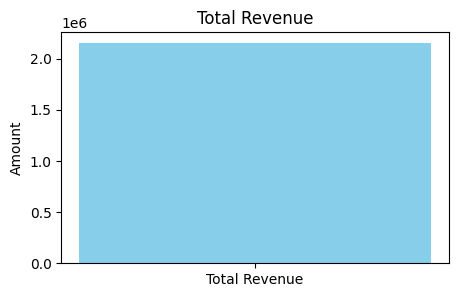

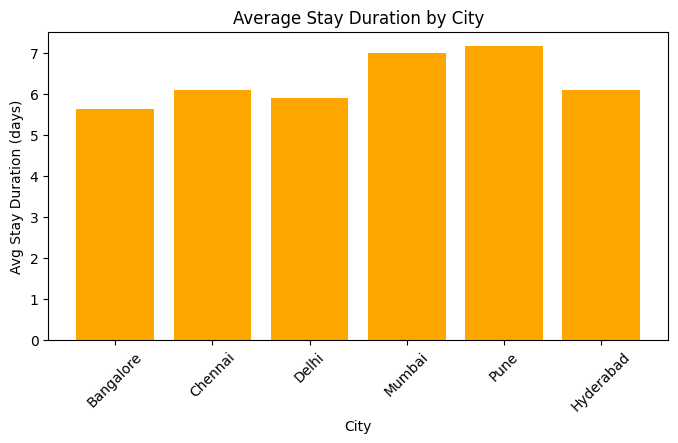

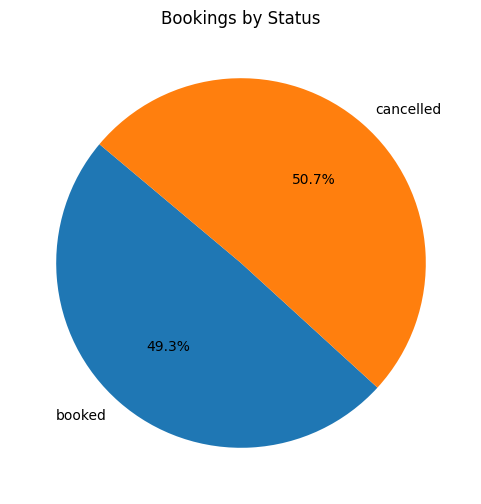

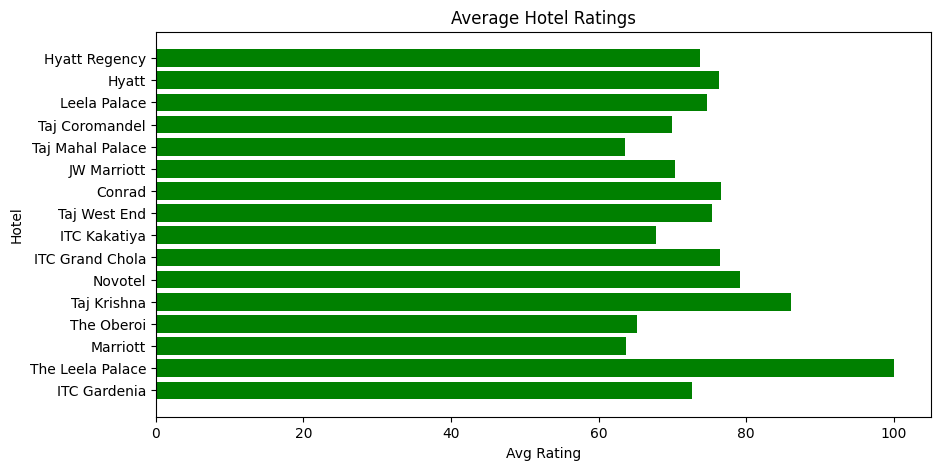

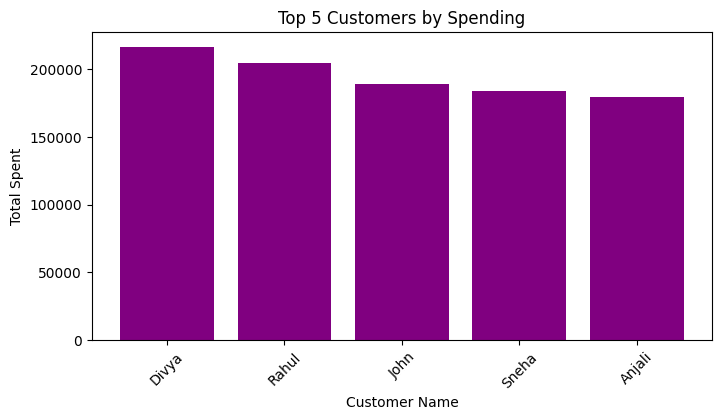

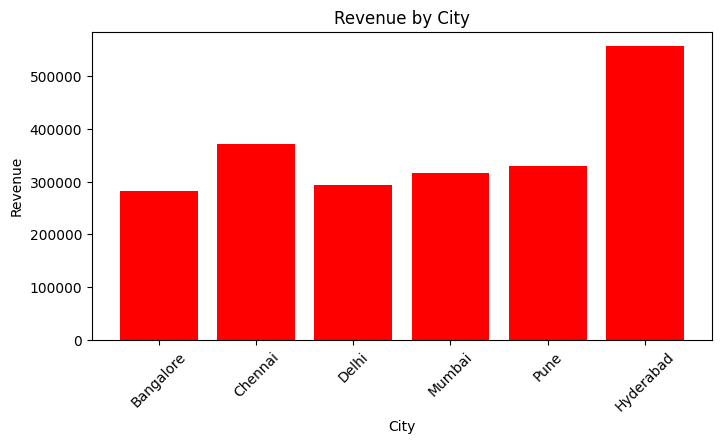

In [0]:
%python
import matplotlib.pyplot as plt

from pyspark.sql import functions as F

# Load the table created from your CSV
df = spark.table("travel_bookings")

# Show schema
df.printSchema()

# Show first few rows
display(df)

# -------------------------
# 1. Total Revenue
# -------------------------
total_revenue = df.agg(F.sum("amount_spent").alias("total_revenue")).toPandas()
print(total_revenue)

# Visualization: just print total revenue as text
plt.figure(figsize=(5,3))
plt.bar(["Total Revenue"], total_revenue["total_revenue"], color="skyblue")
plt.title("Total Revenue")
plt.ylabel("Amount")
plt.show()

# -------------------------
# 2. Average Stay Duration by City
# -------------------------
avg_stay = df.groupBy("city").agg(F.avg("stay_duration").alias("avg_stay_duration")).toPandas()

plt.figure(figsize=(8,4))
plt.bar(avg_stay["city"], avg_stay["avg_stay_duration"], color="orange")
plt.title("Average Stay Duration by City")
plt.xlabel("City")
plt.ylabel("Avg Stay Duration (days)")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# 3. Count of Bookings by Status
# -------------------------
status_count = df.groupBy("status").agg(F.count("*").alias("total_bookings")).toPandas()

plt.figure(figsize=(6,6))
plt.pie(status_count["total_bookings"], labels=status_count["status"], autopct='%1.1f%%', startangle=140)
plt.title("Bookings by Status")
plt.show()

# -------------------------
# 4. Average Rating by Hotel
# -------------------------
hotel_rating = df.groupBy("hotel_name").agg(F.avg("rating").alias("avg_rating")).toPandas()

plt.figure(figsize=(10,5))
plt.barh(hotel_rating["hotel_name"], hotel_rating["avg_rating"], color="green")
plt.title("Average Hotel Ratings")
plt.xlabel("Avg Rating")
plt.ylabel("Hotel")
plt.show()

# -------------------------
# 5. Top 5 Customers by Spending
# -------------------------
top_customers = df.groupBy("customer_name") \
                 .agg(F.sum("amount_spent").alias("total_spent")) \
                 .orderBy(F.col("total_spent").desc()) \
                 .limit(5).toPandas()

plt.figure(figsize=(8,4))
plt.bar(top_customers["customer_name"], top_customers["total_spent"], color="purple")
plt.title("Top 5 Customers by Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

# -------------------------
# 6. Revenue by City
# -------------------------
revenue_city = df.groupBy("city").agg(F.sum("amount_spent").alias("city_revenue")).toPandas()

plt.figure(figsize=(8,4))
plt.bar(revenue_city["city"], revenue_city["city_revenue"], color="red")
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()
